In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

import qp

from rail.core.data import TableHandle
from rail.core.stage import RailStage

from rail.core.data import PqHandle
from rail.core.stage import RailStage



import pandas as pd
import tables_io
import pickle as pickle
%matplotlib inline 

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np



import pandas as pd
import pickle as pickle
%matplotlib inline 

In [3]:
DS = RailStage.data_store
DS.__class__.allow_overwrite = True

In [4]:
scenario = "A"


In [5]:
#pickle_in = open("../../Gal_props_catnoise/lsst_gal_obsmags_cosmodc2_10067_40000cut_deep","rb")
pickle_in = open("../../Gal_props_catnoise/lsst_gal_obsmags_diffsky_10307_40000cut_deep","rb")
lsst_train_mags = pickle.load(pickle_in)
pickle_in.close()

#pickle_in = open("../../lsst_star_obsmags_40000Gal_train_v4","rb")
#lsst_train_star_mags = pickle.load(pickle_in)
#pickle_in.close()

#pickle_in = open("../../Gal_props_catnoise/roman_gal_obsmags_cosmodc2_10067_deep_40000cut","rb")
pickle_in = open("../../Gal_props_catnoise/roman_gal_obsmags_diffsky_10307_deep_40000cut","rb")
roman_train_mags = pickle.load(pickle_in)
pickle_in.close()

#pickle_in = open("../../roman_star_obsmags_40000Gal_train_v2","rb")
#roman_train_star_mags = pickle.load(pickle_in)
#pickle_in.close()

In [6]:
#pickle_in = open("../../Gal_props_catnoise/lsst_gal_obsmags_cosmodc2_10067_10000cut","rb")
pickle_in = open("../../Gal_props_catnoise/lsst_gal_obsmags_diffsky_10307_10000cut","rb")
lsst_test_mags = pickle.load(pickle_in)
pickle_in.close()

#pickle_in = open("../../lsst_star_obsmags_10000Gal_test","rb")
#lsst_test_star_mags = pickle.load(pickle_in)
#pickle_in.close()

#pickle_in = open("../../Gal_props_catnoise/roman_gal_obsmags_cosmodc2_10067_10000cut","rb")
pickle_in = open("../../Gal_props_catnoise/roman_gal_obsmags_diffsky_10307_10000cut","rb")
roman_test_mags = pickle.load(pickle_in)
pickle_in.close()

#pickle_in = open("../../roman_star_obsmags_10000Gal_test","rb")
#roman_test_star_mags = pickle.load(pickle_in)
#pickle_in.close()

In [7]:
len(roman_train_mags['gal_id']['A'])

40000

In [7]:
#pickle_in = open("../../lsst_gal_obsmags_10000Gal_test_v2","rb")
#lsst_test_mags = pickle.load(pickle_in)
#pickle_in.close()

#pickle_in = open("../../roman_gal_obsmags_10000Gal_test_v2","rb")
#roman_test_mags = pickle.load(pickle_in)
#pickle_in.close()

In [8]:
use_filters = ['Y106', 'J129', 'H158', 'F184', 'W146']
pickle_in = open("../../SED_fit_coeff/final_run/40000Gal_1ordfit_A_YJHFW_diffsky_deep_10307", "rb")
#pickle_in = open("../../SED_fit_coeff/final_run/40000Gal_1ordfit_A_YJHFW_cosmoDC2_deep_10067", "rb")
coeffs = pickle.load(pickle_in)
pickle_in.close()
coeff_diff_slope = {}
coeff_gal = {}
coeff_star = {}
flux_star = {}
flux_gal = {}
coeff_diff_0th = {}
coeff_diff_2nd = {}
coeff_diff_3rd = {}
for filter_ in use_filters:
    coeffs_gal_slope = coeffs['gal'][1][filter_]
    coeffs_star_slope = coeffs['star:'][1][filter_]
    coeff_diff_slope[filter_] = coeffs_star_slope - coeffs_gal_slope
    coeff_gal[filter_] = coeffs['gal'][1][filter_]
    coeff_star[filter_] = coeffs['star:'][1][filter_]
    flux_star[filter_] = coeffs['star_fluxes'][filter_]
    flux_gal[filter_] = coeffs['gal_fluxes'][filter_]
    coeff_diff_0th[filter_] = coeffs['star:'][0][filter_]- coeffs['gal'][0][filter_]
    #coeff_diff_2nd[filter_] = coeffs['star:'][2][filter_]*coeffs['gal'][0][filter_] - coeffs['star:'][0][filter_]*coeffs['gal'][2][filter_]
    #coeff_diff_2nd[filter_] = coeff_diff_2nd[filter_]
coeff_gal_train = coeff_gal.copy()
coeff_star_train = coeff_star.copy()

In [9]:
use_filters = ['Y106', 'J129', 'H158', 'F184', 'W146']
pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_1ordfit_A_YJHFW_diffsky_10307", "rb")
#pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_1ordfit_A_YJHFW_cosmoDC2_10067", "rb")
coeffs = pickle.load(pickle_in)
pickle_in.close()
coeff_diff_slope = {}
coeff_gal = {}
coeff_star = {}
flux_star = {}
flux_gal = {}
coeff_diff_0th = {}
coeff_diff_2nd = {}
coeff_diff_3rd = {}
for filter_ in use_filters:
    coeffs_gal_slope = coeffs['gal'][1][filter_]
    coeffs_star_slope = coeffs['star:'][1][filter_]
    coeff_diff_slope[filter_] = coeffs_star_slope - coeffs_gal_slope
    coeff_gal[filter_] = coeffs['gal'][1][filter_]
    coeff_star[filter_] = coeffs['star:'][1][filter_]
    flux_star[filter_] = coeffs['star_fluxes'][filter_]
    flux_gal[filter_] = coeffs['gal_fluxes'][filter_]
    coeff_diff_0th[filter_] = coeffs['star:'][0][filter_]- coeffs['gal'][0][filter_]
    #coeff_diff_2nd[filter_] = coeffs['star:'][2][filter_]*coeffs['gal'][0][filter_] - coeffs['star:'][0][filter_]*coeffs['gal'][2][filter_]
    #coeff_diff_2nd[filter_] = coeff_diff_2nd[filter_]
coeff_gal_test = coeff_gal.copy()
coeff_star_test = coeff_star.copy()

In [10]:
def Hcut_SN18(scenario = 'A'):
    if scenario == 'A':
        return 24.96
    elif scenario == 'B':
        return 23.93
    elif scenario == 'C':
        return 24.31
    elif scenario == 'D':
        return 24.49
    elif scenario == 'E':
        return 24.31
    elif scenario == 'F':
        return 24.31

In [11]:

z_test = roman_test_mags['z']



In [12]:
len(roman_test_mags['obs_mag']['A']['H158'])

10000

In [13]:
df_train = pd.DataFrame({**lsst_train_mags['obs_mag']['A'], **roman_train_mags['obs_mag']['A'],
                         **{'sed_slope':coeff_gal_train['H158']}, **{'z_true':roman_train_mags['z']['A']}})

df_test = pd.DataFrame({**lsst_test_mags['obs_mag'], **roman_test_mags['obs_mag']['A'],
                         **{'sed_slope':coeff_gal_test['H158']}, **{'z_true':roman_test_mags['z']}})

In [43]:
pickle_in = open("../../Removed_SEDs/cosmodc2_10067_deep_25pcentSEDcut","rb")
#pickle_in = open("../../Gal_props_catnoise/roman_gal_obsmags_diffsky_10307_deep_10000cut","rb")
SEDcut = pickle.load(pickle_in)
pickle_in.close()

In [44]:
#df_train = df_train.iloc[SEDcut]

In [45]:
#bands = ['u','g','r','i','z','y', 'Y106', 'J129','H158', 'F184']
#for col in bands:
#    df_train[col] += np.random.normal(0, 0.5, len(df_train[col]))

In [46]:
#df_train['chromatic_correction_true'] = df_train['chromatic_correction_true']*1e5 + 1.5
#df_test['chromatic_correction_true'] = df_test['chromatic_correction_true']*1e5 + 1.5

In [14]:
np_train = tables_io.convert(df_train, tables_io.types.NUMPY_DICT)
np_test = tables_io.convert(df_test, tables_io.types.NUMPY_DICT)

#hdf5_filename_train = f"./data/photoz_samples/testing/training_scenario{scenario}.hdf5"
#hdf5_filename_test = f"./data/photoz_samples/testing/testing_scenario{scenario}.hdf5"

hdf5_filename_train = f"./data/photoz_samples/testing/training_scenario{scenario}_cosmodc2.hdf5"
hdf5_filename_test = f"./data/photoz_samples/testing/testing_scenario{scenario}_cosmodc2.hdf5"


tables_io.write(np_train, hdf5_filename_train)
tables_io.write(np_test, hdf5_filename_test)


'./data/photoz_samples/testing/testing_scenarioA_cosmodc2.hdf5'

In [15]:
df_train.columns

Index(['u', 'g', 'r', 'i', 'z', 'y', 'Y106', 'J129', 'H158', 'F184', 'W146',
       'sed_slope', 'z_true'],
      dtype='object')

In [16]:

training_data_a = DS.read_file(f"training_{scenario}_cosmodc2", TableHandle, hdf5_filename_train)
testing_data_a = DS.read_file(f"testing_{scenario}_cosmodc2", TableHandle, hdf5_filename_test)



In [17]:
band_name = []
err_name = []
redshift_name = list(df_train.columns)[1]
mag_lim = {"u": 27.2,
            "g": 27.5,
            "r": 27.2,
            "i": 27.0,
            "z": 26.6,
            "y": 25.9, 
            'Y106': 26.6, 'J129': 26.54, 'H158': 26.48, 'F184': 26 }
#for column in list(df_train.columns)[3:]:
for column in list(df_train.columns)[:-3]:
    if "err" in column:
        err_name.append(column)
    else:
        band_name.append(column)




In [18]:
band_name, err_name

(['u', 'g', 'r', 'i', 'z', 'y', 'Y106', 'J129', 'H158', 'F184'], [])

In [19]:
#band_name = band_name[:6]#.append('H158')
#band_name.append('H158')

In [20]:
band_name

['u', 'g', 'r', 'i', 'z', 'y', 'Y106', 'J129', 'H158', 'F184']

In [21]:
from rail.estimation.algos.somoclu_som import *


In [22]:
grid_type = 'hexagonal'
inform_dict = dict(model='output_SOMoclu_model_cosmodc2_SEDcut25.pkl', hdf5_groupname='',
                   n_rows=32, n_columns=32,
                   gridtype = grid_type,
                   std_coeff=12.0, som_learning_rate=0.75,
                   mag_limits = mag_lim,
                   #column_usage='colors',bands = band_name)
                   bands = band_name[:], column_usage='colors')
                   #ref_band = 'r')
inform_som = SOMocluInformer.make_stage(name='inform_som', **inform_dict)

In [23]:
%%time
inform_som.inform(training_data_a)

Inserting handle into data store.  model_inform_som: inprogress_output_SOMoclu_model_cosmodc2_SEDcut25.pkl, inform_som
CPU times: user 27.5 s, sys: 7.35 ms, total: 27.5 s
Wall time: 1.6 s


In [24]:
with open("output_SOMoclu_model_cosmodc2_SEDcut25.pkl", "rb") as f:
    model = pickle.load(f)

In [25]:
model.keys()

dict_keys(['som', 'usecols', 'ref_column', 'n_rows', 'n_columns', 'column_usage'])

In [26]:
model['column_usage']

'colors'

In [27]:
bands = ['u','g','r','i','z','y', 'Y106', 'J129','H158', 'F184']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal = len(training_data_a.data['H158'])
colors = np.zeros([9, ngal])
for i in range(9):
    colors[i] = training_data_a.data[bandnames[i]] - training_data_a.data[bands[i + 1]]

In [28]:
#bands = ['u','g','r','i','z','y']
#bandnames = bands# [f"mag_{band}_lsst" for band in bands]
#ngal = len(training_data_a.data['r'])
#colors = np.zeros([5, ngal])
#for i in range(5):
#    colors[i] = training_data_a.data[bandnames[i]] - training_data_a.data[bands[i + 1]]

In [29]:
bands = ['u','g','r','i','z','y', 'Y106', 'J129','H158', 'F184']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal_test = len(testing_data_a.data['r'])
colors_test = np.zeros([9, ngal_test])
for i in range(9):
    colors_test[i] = testing_data_a.data[bandnames[i]] - testing_data_a.data[bands[i + 1]]

In [29]:
bands = ['Y106', 'J129','H158', 'F184']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal = len(training_data_a.data['H158'])
colors = np.zeros([3, ngal])
for i in range(3):
    colors[i] = training_data_a.data[bandnames[i]] - training_data_a.data[bands[i + 1]]

In [30]:
#bands = ['u','g','r','i','z','y']
#bandnames = bands# [f"mag_{band}_lsst" for band in bands]
#ngal = len(training_data_a.data['r'])
#colors = np.zeros([5, ngal])
#for i in range(5):
#    colors[i] = training_data_a.data[bandnames[i]] - training_data_a.data[bands[i + 1]]

In [31]:
bands = [ 'Y106', 'J129','H158', 'F184']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal_test = len(testing_data_a.data['r'])
colors_test = np.zeros([3, ngal_test])
for i in range(3):
    colors_test[i] = testing_data_a.data[bandnames[i]] - testing_data_a.data[bands[i + 1]]

In [36]:
bands = ['u','g','r','i','z','y', 'H158']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal = len(training_data_a.data['H158'])
colors = np.zeros([6, ngal])
for i in range(6):
    colors[i] = training_data_a.data[bandnames[i]] - training_data_a.data[bands[i + 1]]

In [37]:
bands = ['u','g','r','i','z','y', 'H158']
bandnames = bands# [f"mag_{band}_lsst" for band in bands]
ngal_test = len(testing_data_a.data['r'])
colors_test = np.zeros([6, ngal_test])
for i in range(6):
    colors_test[i] = testing_data_a.data[bandnames[i]] - testing_data_a.data[bands[i + 1]]

In [30]:
SOM = model['som']
bmu_coordinates = get_bmus(SOM, colors.T).T
meanszs = np.zeros_like(SOM.umatrix)
meanslops = np.zeros_like(SOM.umatrix)
meancol = np.zeros_like(SOM.umatrix)
cellocc = np.zeros_like(SOM.umatrix)

for i in range(training_data_a.data['sed_slope'].size):
    bmu_x, bmu_y = bmu_coordinates.T[i]
    #meanszs[bmu_x, bmu_y] += training_data_a.data['chromatic_correction_true'][i]
    #meanszs[bmu_x, bmu_y] += training_data_a.data['z_true'][i]
    meancol[bmu_x, bmu_y] += colors[7][i]
    meanslops[bmu_x, bmu_y] += training_data_a.data['sed_slope'][i]
    meanszs[bmu_x, bmu_y] += training_data_a.data['z_true'][i]
    cellocc[bmu_x, bmu_y] += 1
meanslops /= cellocc
meanszs /= cellocc
meancol /= cellocc
#meanszs = (meanszs - 1.5)/1e5


/tmp/ipykernel_771410/259215017.py:16: RuntimeWarning: invalid value encountered in divide
  meanslops /= cellocc
/tmp/ipykernel_771410/259215017.py:17: RuntimeWarning: invalid value encountered in divide
  meanszs /= cellocc
/tmp/ipykernel_771410/259215017.py:18: RuntimeWarning: invalid value encountered in divide
  meancol /= cellocc


In [31]:
SOM = model['som']
bmu_coordinates = get_bmus(SOM, colors_test.T).T
#meanszs_test = np.zeros_like(SOM.umatrix)
#meanszs_test = np.zeros_like(SOM.umatrix
meanslops_test = np.zeros_like(SOM.umatrix)
est_slope = np.zeros(len(testing_data_a.data['sed_slope']))
cellocc_test = np.zeros_like(SOM.umatrix)

for i in range(testing_data_a.data['sed_slope'].size):
    bmu_x, bmu_y = bmu_coordinates.T[i]
    #meanszs[bmu_x, bmu_y] += training_data_a.data['chromatic_correction_true'][i]
    #meanszs[bmu_x, bmu_y] += training_data_a.data['z_true'][i]
    meanslops_test[bmu_x, bmu_y]  += testing_data_a.data['sed_slope'][i]
    est_slope[i] = meanslops[bmu_x, bmu_y]#*cellocc[bmu_x, bmu_y]
    #meanszs_test[bmu_x, bmu_y] += testing_data_a.data['z_true'][i]
    cellocc_test[bmu_x, bmu_y] += 1
meanslops_test /= cellocc_test
#meanszs_test /= cellocc_test

/tmp/ipykernel_771410/319638191.py:17: RuntimeWarning: invalid value encountered in divide
  meanslops_test /= cellocc_test


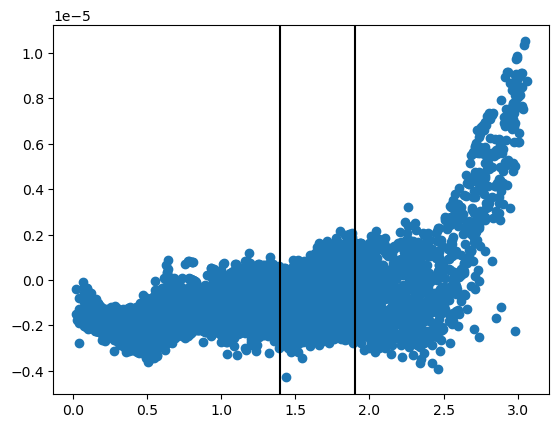

In [34]:
plt.scatter(z_test,testing_data_a.data['sed_slope'] )
plt.axvline(x = 1.4, color = 'black')
plt.axvline(x = 1.9, color = 'black')
plt.show()

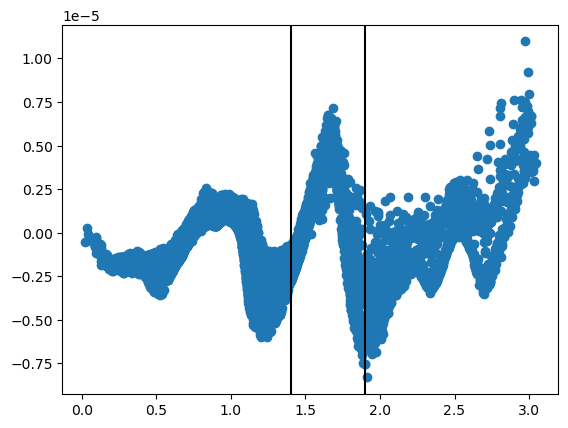

In [33]:
plt.scatter(z_test,testing_data_a.data['sed_slope'] )
plt.axvline(x = 1.4, color = 'black')
plt.axvline(x = 1.9, color = 'black')
plt.show()

In [47]:
# H158, diffsky
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.848145984695293e-06 -1.9781292610140878e-06
4.569926375097566e-07 4.303337012956047e-07
-1.1609383818722563e-06 -2.1680349488414857e-06
-3.7811219044669997e-07 7.376563130205197e-07
-7.14528198386688e-07 -1.1043259952424766e-06
-7.744094432382553e-07 -8.339746814698567e-07


In [35]:
# H158, cd2
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.6178689747903263e-06 -1.882119538289409e-06
-1.1398477681723307e-06 -1.3406121519448873e-06
-7.956653576002282e-07 -9.75552745907809e-07
-7.783129944982647e-07 -8.538178170845445e-07
2.3984549102351593e-07 3.807198874351068e-07
-9.5729342319828e-07 -1.0516454609902077e-06


In [167]:
# H158, cd2, 25% sed cut
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.5977448128978722e-06 -1.882119538289409e-06
-1.1277196563241887e-06 -1.3406121519448873e-06
-9.790733201953117e-07 -9.75552745907809e-07
-6.349870886879216e-07 -8.538178170845445e-07
4.434265292729833e-07 3.807198874351068e-07
-1.0264603815812734e-06 -1.0516454609902077e-06


In [136]:
# H158, cd2, 55% sed cut
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.658396854509192e-06 -1.882119538289409e-06
-1.4173087947710883e-06 -1.3406121519448873e-06
-1.3022697658016114e-06 -9.75552745907809e-07
-1.3022697658016114e-06 -8.538178170845445e-07
-6.570967343577649e-07 3.807198874351068e-07
-1.3817265198667883e-06 -1.0516454609902077e-06


In [202]:
# H158, diffsky test train cd2
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.9343081021361286e-06 -1.9781292610140878e-06
-1.3430849890028185e-06 4.303337012956047e-07
-9.786855343918432e-07 -2.1680349488414857e-06
-8.983870998235943e-07 7.376563130205197e-07
-5.308575623530487e-08 -1.1043259952424766e-06
-1.1851938097606762e-06 -8.339746814698567e-07


In [34]:
# H158, diffsky roman bands only
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask]), np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

-1.6819616348584532e-06 -1.9781292610140878e-06
2.8981054001064877e-08 4.303337012956047e-07
-1.3755606005361187e-06 -2.1680349488414857e-06
-1.7022114207065897e-07 7.376563130205197e-07
1.2358825074443303e-07 -1.1043259952424766e-06
-6.6999012915403e-07 -8.339746814698567e-07


In [792]:
# H158
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(est_slope[mask])/np.mean(testing_data_a.data['sed_slope'][mask]))
print(np.nanmedian(est_slope), np.mean(testing_data_a.data['sed_slope']))

0.7917252873622665
0.8999088470774352
1.0499847563203941
1.065455943225231
1.1411177127885106
-1.0466796993569005e-06 -1.0183239985984318e-06


In [36]:
#pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_diffsky_10307" ,"rb")
#pickle_in = open("SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_cosmoDC2_10067" ,"rb")
#pred_coeff = pickle.load(pickle_in)
#pickle_in.close()

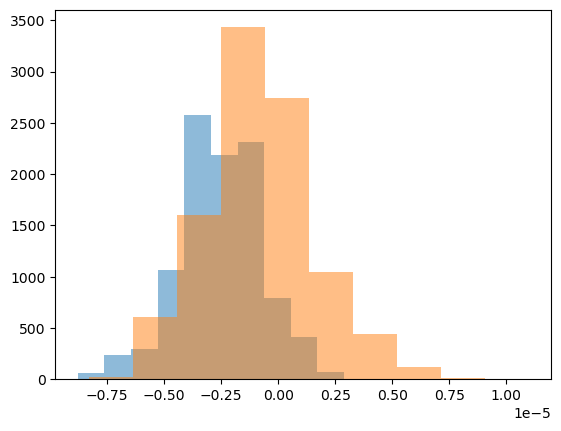

In [38]:
plt.hist(pred_coeffs_all['H158'], alpha = 0.5)
plt.hist(coeff_gal_test['H158'], alpha = 0.5)
plt.show()

In [80]:
len(np.where(np.isnan(est_slope))[0]), len(est_slope)

(18, 10000)

In [34]:
nan_mask = np.where(np.isnan(est_slope))[0]
est_slope[nan_mask] = np.nanmean(est_slope)

In [35]:
pred_coeffs_all = {}
pred_coeffs_all['H158'] = coeff_star_test['H158'] - est_slope

In [51]:
# H158, diffsky
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(pred_coeffs_all['H158'][mask]), np.mean(coeff_diff_slope['H158'][mask]))
print(np.nanmedian(pred_coeffs_all['H158']), np.mean(coeff_diff_slope['H158']))

-1.4135901767445503e-06 -1.2123913379733148e-06
-3.624627481871685e-06 -3.626054497705838e-06
-2.0984057958487906e-06 -1.0230835571963422e-06
-2.7460713363139863e-06 -3.9254854144087186e-06
-2.491580104789678e-06 -2.094986252741248e-06
-2.424890182665721e-06 -2.3588711476406856e-06


In [43]:
# H158, cd2
z_bins = [0.0, 0.65, 1.0, 1.4, 1.9, 3.5]
for j in range(0,5):
    mask = np.logical_and(z_test > z_bins[j], z_test < z_bins[j + 1])
    print(np.nanmedian(pred_coeffs_all['H158'][mask]), np.mean(coeff_diff_slope['H158'][mask]))
print(np.nanmedian(pred_coeffs_all['H158']), np.mean(coeff_diff_slope['H158']))

-1.625147719693788e-06 -1.3083728118175575e-06
-2.0892970201491784e-06 -1.8579308026133314e-06
-2.3537924856626834e-06 -2.2144388867478595e-06
-2.5026044337181203e-06 -2.332825099797796e-06
-3.4839684711673497e-06 -3.5810549393150438e-06
-2.2516196601301707e-06 -2.141200368120335e-06


In [44]:
#pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_diffsky_10307","wb")
#pickle.dump(pred_coeffs_all , pickle_in)
#pickle_in.close()

In [36]:
pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_cd2_romanonly_10067","wb")
pickle.dump(pred_coeffs_all , pickle_in)
pickle_in.close()

In [39]:
pred_coeffs_all['H158']

array([-7.32812568e-06, -2.59439199e-06,  3.29454342e-07, ...,
       -2.69072425e-06, -1.95102675e-06, -5.94621859e-06])

In [41]:
scenarios = ['A']
coeff_diff_slope = {}
#for scenario  in scenarios:
#pickle_in = open("SED_fit_coeff/Scenarios/10000Gal_test_"+'A'+ "_YJHF_v2_linear", "rb")
#pickle_in = open("SED_fit_coeff/Scenarios/10000Gal_test_"+'A'+ "_YJHF_v2", "rb")
#pickle_in = open("SED_fit_coeff/final_run/10000Gal_1ordfit_A_YJHFW_diffsky_10307", "rb")
#pickle_in = open("SED_fit_coeff/final_run/10000Gal_A_YJHFW_diffsky_10307", "rb")
pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_1ordfit_A_YJHFW_cosmoDC2_10067", "rb")
#pickle_in = open("SED_fit_coeff/final_run/10000Gal_2ordfit_A_YJHFW_cosmoDC2_10067", "rb")
#pickle_in = open("SED_fit_coeff/Scenarios/10000Gal_test_"+ 'A'+ "_YJHF_cosmoDC2_fullsed", "rb")
coeffs = pickle.load(pickle_in)
pickle_in.close()
coeff_diff_slope = {}
coeff_gal = {}
coeff_star = {}
flux_star = {}
flux_gal = {}
coeff_diff_0th = {}
coeff_diff_2nd = {}
coeff_diff_3rd = {}
for filter_ in ['H158']:
    coeffs_gal_slope = coeffs['gal'][1][filter_]
    coeffs_star_slope = coeffs['star:'][1][filter_]
    coeff_diff_slope[filter_] = coeffs_star_slope - coeffs_gal_slope
    coeff_gal[filter_] = coeffs['gal'][1][filter_]
    coeff_star[filter_] = coeffs['star:'][1][filter_]
    flux_star[filter_] = coeffs['star_fluxes'][filter_]
    flux_gal[filter_] = coeffs['gal_fluxes'][filter_]
    coeff_diff_0th[filter_] = coeffs['star:'][0][filter_]- coeffs['gal'][0][filter_]
    coeff_diff_2nd[filter_] = coeffs['star:'][2][filter_]*coeffs['gal'][0][filter_] - coeffs['star:'][0][filter_]*coeffs['gal'][2][filter_]
    coeff_diff_2nd[filter_] = coeff_diff_2nd[filter_]
coeff_diff = coeff_diff_slope.copy()

In [54]:
pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_cd2_romanonly_10067" ,"rb")
#pickle_in = open("SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_diffsky_10307" ,"rb")
#pickle_in = open("../../SED_fit_coeff/final_run/10000Gal_SOMpred_A_H_cosmodc2_10067" ,"rb")
pred_coeff = pickle.load(pickle_in)
pickle_in.close()

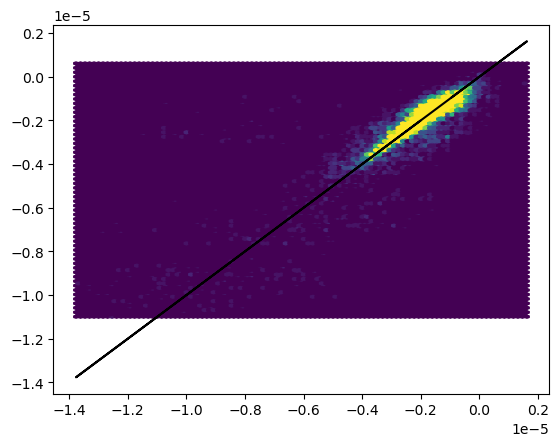

In [55]:
plt.hexbin(coeff_diff['H158'],pred_coeff['H158'],vmax = 20 )
plt.plot(coeff_diff['H158'], coeff_diff['H158'], color = 'black')
plt.show()

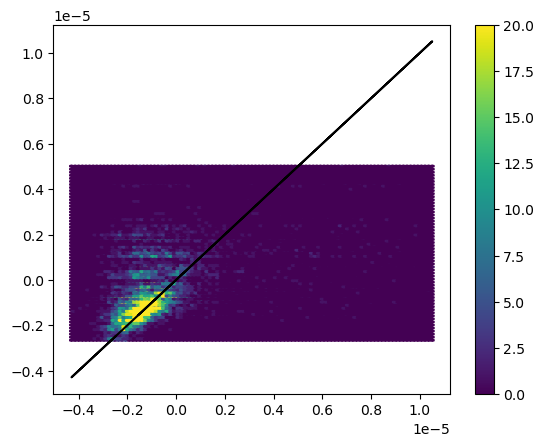

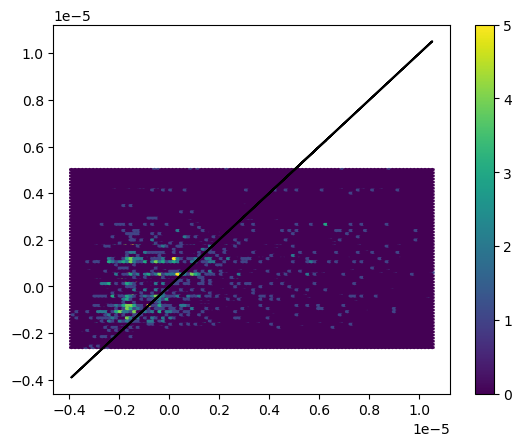

In [113]:
plt.hexbin((testing_data_a.data['sed_slope']), est_slope, vmin = 0, vmax = 20)
plt.plot(testing_data_a.data['sed_slope'], testing_data_a.data['sed_slope'], color = 'black')
plt.colorbar()
plt.show()

mask = np.logical_and(z_test > 1.9, z_test < 3.1)
plt.hexbin((testing_data_a.data['sed_slope'])[mask], est_slope[mask], vmin = 0, vmax = 5)
plt.plot(testing_data_a.data['sed_slope'][mask], testing_data_a.data['sed_slope'][mask], color = 'black')
plt.colorbar()
plt.show()

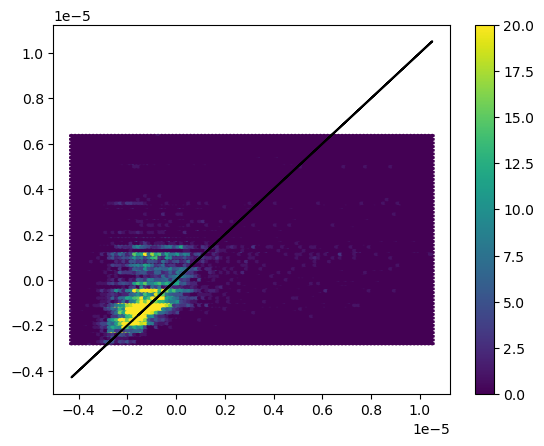

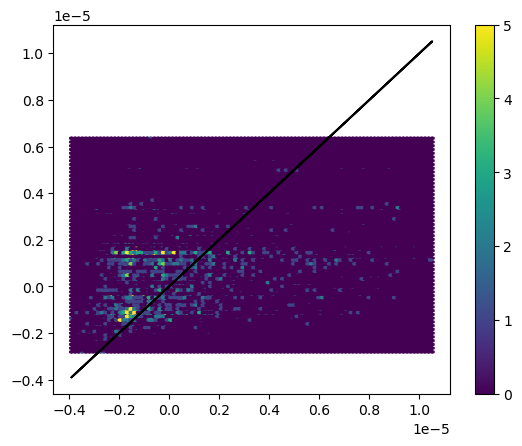

In [91]:
plt.hexbin((testing_data_a.data['sed_slope']), est_slope, vmin = 0, vmax = 20)
plt.plot(testing_data_a.data['sed_slope'], testing_data_a.data['sed_slope'], color = 'black')
plt.colorbar()
plt.show()

mask = np.logical_and(z_test > 1.9, z_test < 3.1)
plt.hexbin((testing_data_a.data['sed_slope'])[mask], est_slope[mask], vmin = 0, vmax = 5)
plt.plot(testing_data_a.data['sed_slope'][mask], testing_data_a.data['sed_slope'][mask], color = 'black')
plt.colorbar()
plt.show()

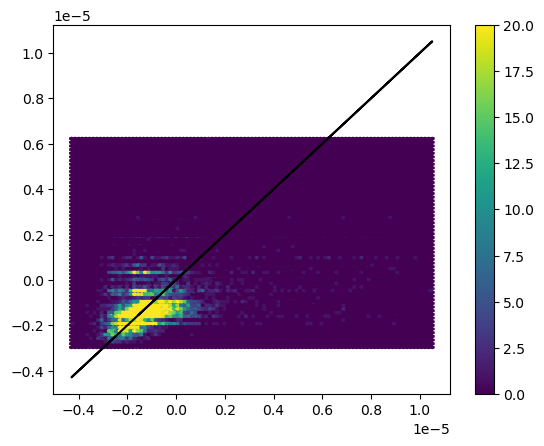

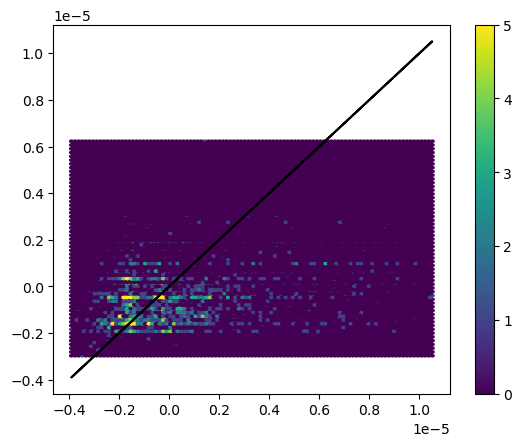

In [137]:
plt.hexbin((testing_data_a.data['sed_slope']), est_slope, vmin = 0, vmax = 20)
plt.plot(testing_data_a.data['sed_slope'], testing_data_a.data['sed_slope'], color = 'black')
plt.colorbar()
plt.show()

mask = np.logical_and(z_test > 1.9, z_test < 3.1)
plt.hexbin((testing_data_a.data['sed_slope'])[mask], est_slope[mask], vmin = 0, vmax = 5)
plt.plot(testing_data_a.data['sed_slope'][mask], testing_data_a.data['sed_slope'][mask], color = 'black')
plt.colorbar()
plt.show()

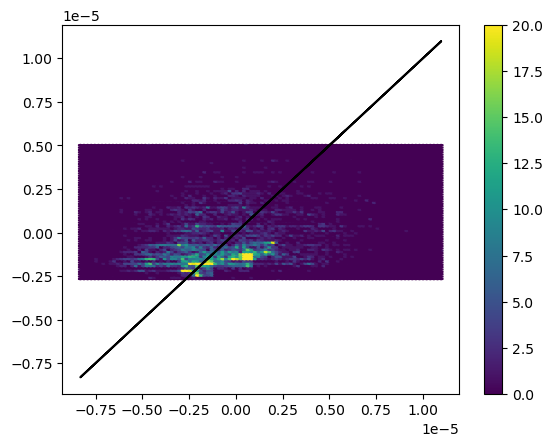

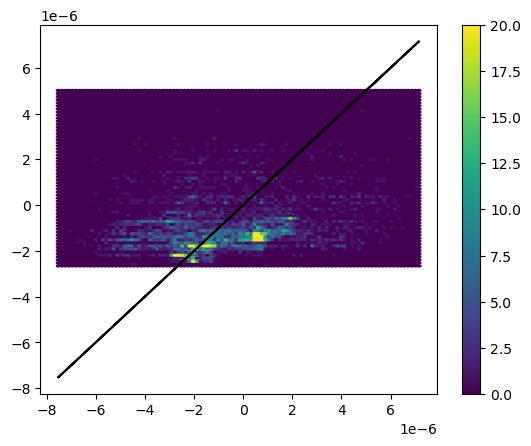

In [210]:
plt.hexbin((testing_data_a.data['sed_slope']), est_slope, vmin = 0, vmax = 20)
plt.plot(testing_data_a.data['sed_slope'], testing_data_a.data['sed_slope'], color = 'black')
plt.colorbar()
plt.show()

plt.hexbin((testing_data_a.data['sed_slope'])[z_test < 1.9], est_slope[z_test < 1.9], vmin = 0, vmax = 20)
plt.plot(testing_data_a.data['sed_slope'][z_test < 1.9], testing_data_a.data['sed_slope'][z_test < 1.9], color = 'black')
plt.colorbar()
plt.show()

In [37]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager

#mpl.rcParams['font.family']='serif'
#cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
#mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext']=True

from matplotlib import rcParams
rcParams.update({'font.family': 'serif', 'mathtext.fontset': 'dejavuserif',
                 'font.size': 12, 'text.latex.preamble': r"\usepackage{amsmath}",
                 'xtick.major.pad': 2, 'ytick.major.pad': 2, 'xtick.major.size': 6, 'ytick.major.size': 6,
                 'xtick.minor.size': 3, 'ytick.minor.size': 3, 'axes.linewidth': 2, 'axes.labelpad': 1})

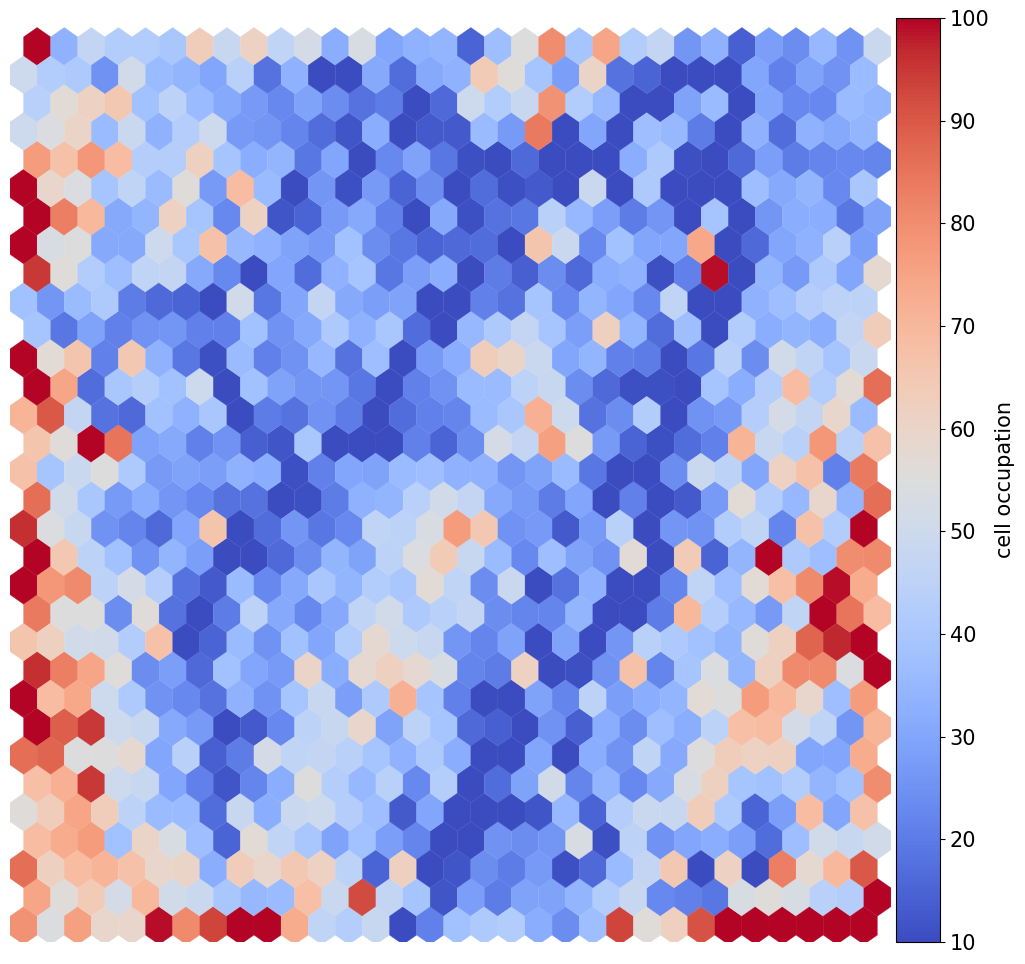

In [81]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
plot_som(ax, cellocc.T, grid_type=grid_type, colormap=cm.coolwarm, cbar_name='cell occupation', vmin = 10, vmax = 100)

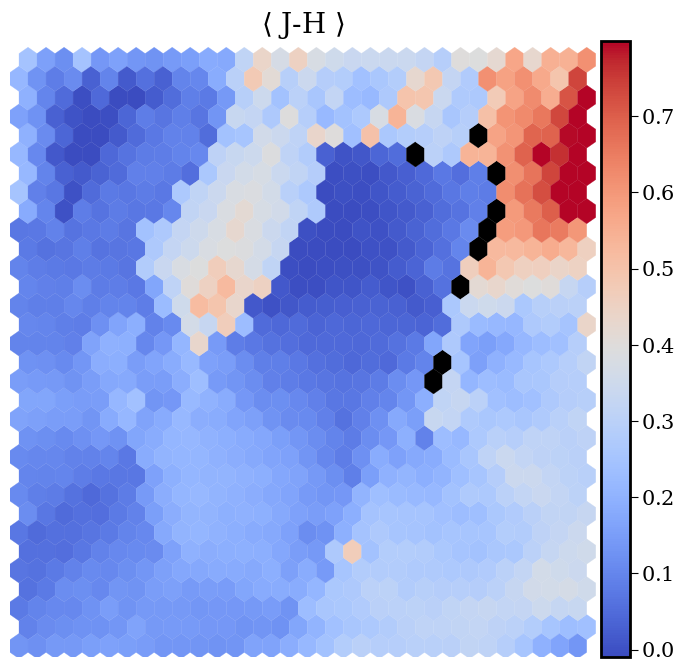

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plot_som(ax, meancol.T, grid_type=grid_type, colormap=cm.coolwarm, cbar_name='')
ax.set_title(r'$\langle$ J-H $\rangle$', fontsize = 20)
save = True
if save:
    plt.savefig('../../PaperFigures/SOM_JH.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

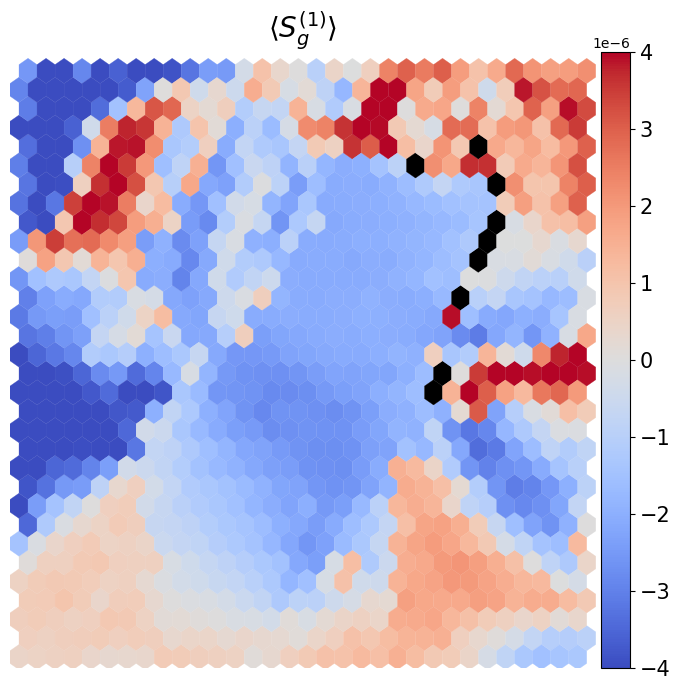

In [35]:
from matplotlib.ticker import ScalarFormatter
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
plot_som(ax, meanslops.T, grid_type=grid_type, colormap=cm.coolwarm, cbar_name='',vmin=-4*1e-6, vmax=4*1e-6)
ax.set_title(r'$\langle S_g^{(1)}\rangle$', fontsize = 20)
save = True
if save:
    plt.savefig('../../PaperFigures/SOM_Sg.png', format='png', dpi=300,bbox_inches='tight')
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
#formatter.set_powerlimits((-2, 2))  # Limits for scientific notation
ax.yaxis.set_major_formatter(formatter)
ax.yaxis.offsetText.set_fontsize(52)
plt.show()

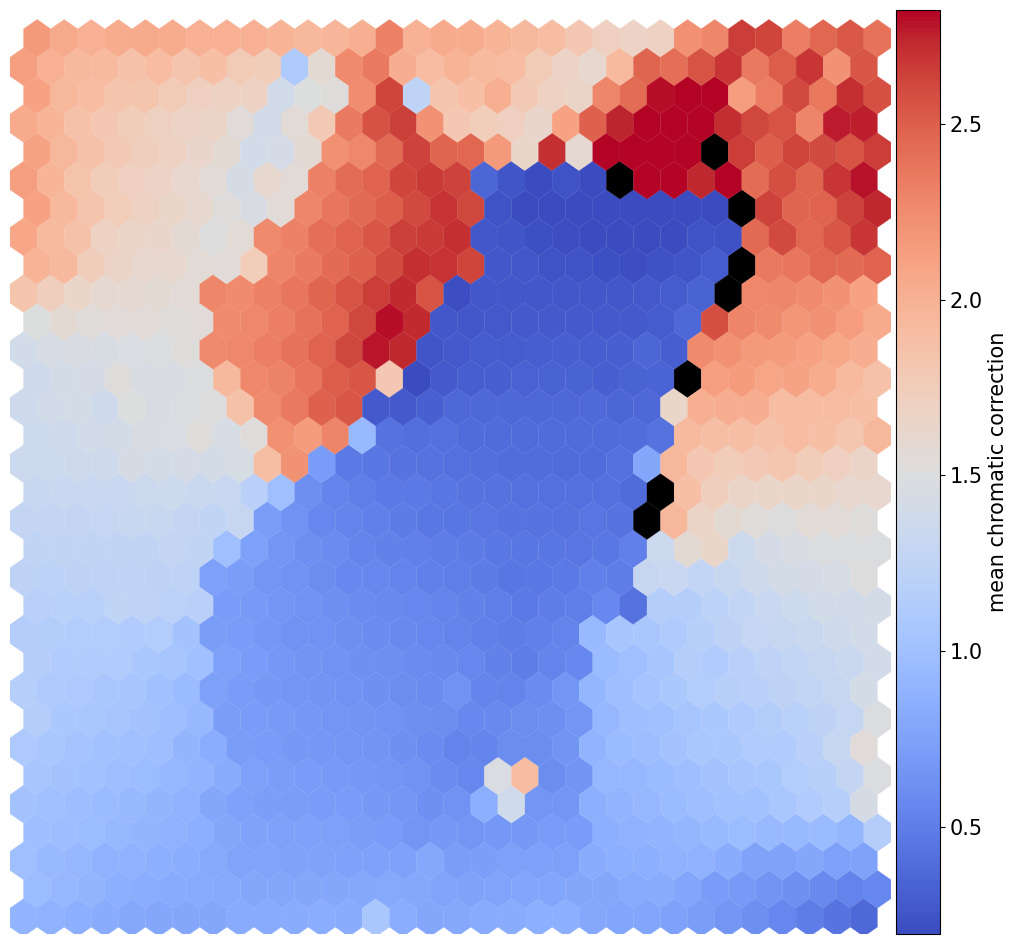

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,12))
plot_som(ax, meanszs.T, grid_type=grid_type, colormap=cm.coolwarm, cbar_name='mean chromatic correction')


In [55]:
pzflex_qp_flexzboost = FlexZBoostEstimator.make_stage(name=f'fzboost_flexzboost_{scenario}', 
                            model=fz_modelfile,
                            output=f'output/fzb_{scenario}.hdf5',
                            qp_representation='flexzboost',**fz_dict)

NameError: name 'FlexZBoostEstimator' is not defined

In [20]:
pzflex_qp_flexzboost.config

StageConfig{output_mode:default,chunk_size:10000,hdf5_groupname:,zmin:0.0,zmax:6.0,nzbins:301,calculated_point_estimates:[],recompute_point_estimates:False,nondetect_val:99.0,mag_limits:{'u': 27.79, 'g': 29.04, 'r': 29.06, 'i': 28.62, 'z': 27.98, 'y': 27.05, 'Y106': 26.9, 'J129': 26.9, 'H158': 26.9, 'F184': 25.5},bands:['u', 'g', 'r', 'i', 'z', 'y', 'Y106', 'J129', 'H158', 'F184'],err_bands:['u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'y_err', 'Y106_err', 'J129_err', 'H158_err', 'F184_err'],ref_band:H158,qp_representation:flexzboost,name:fzboost_flexzboost_A,model:FZB_model_chrom2A.pkl,output:output/fzb_A.hdf5,trainfrac:0.75,bumpmin:0.02,bumpmax:0.35,nbump:20,sharpmin:0.7,sharpmax:2.1,nsharp:15,max_basis:35,basis_system:cosine,regression_params:{'max_depth': 8, 'objective': 'reg:squarederror', 'learning_rate': 0.3, 'silent': 1},redshift_col:chromatic_correction_true,config:None,input:None,}

In [21]:
fzresults_qp_flexzboost = pzflex_qp_flexzboost.estimate(testing_data_a)


Inserting handle into data store.  model: FZB_model_chrom2A.pkl, fzboost_flexzboost_A
Process 0 running estimator on chunk 0 - 10000
Process 0 estimating PZ PDF for rows 0 - 10,000
Inserting handle into data store.  output_fzboost_flexzboost_A: output/inprogress_fzb_A.hdf5, fzboost_flexzboost_A
Process 0 running estimator on chunk 10000 - 20000
Process 0 estimating PZ PDF for rows 10,000 - 20,000
Process 0 running estimator on chunk 20000 - 30000
Process 0 estimating PZ PDF for rows 20,000 - 30,000
Process 0 running estimator on chunk 30000 - 40000
Process 0 estimating PZ PDF for rows 30,000 - 40,000


In [22]:
zgrid = np.arange(0,6,0.01)
fzb_mode = fzresults_qp_flexzboost.data.mode(zgrid)
fzb_median = fzresults_qp_flexzboost.data.median()
# fzb_mean = fzresults_qp_flexzboost.data.mean()

In [30]:
(fzresults_qp_flexzboost.data).shape, testing_data_a.data['F184'].shape

((10000,), (40000,))

In [24]:
fzb_mode.shape

(10000, 1)

In [24]:
df_test['flexzboost_mode'] = fzb_mode
df_test['flexzboost_median'] = fzb_median


In [23]:
df_test.to_parquet(f'output/test_scenario_{scenario}_fzb.pq')

In [32]:

corr_true = testing_data_a.data['chromatic_correction_true']

In [41]:
fzb_median.shape, corr_true.shape

((10000, 1), (40000,))

In [33]:
np.corrcoef(corr_true[:10000], fzb_median[:, 0])

array([[1.        , 0.01672809],
       [0.01672809, 1.        ]])

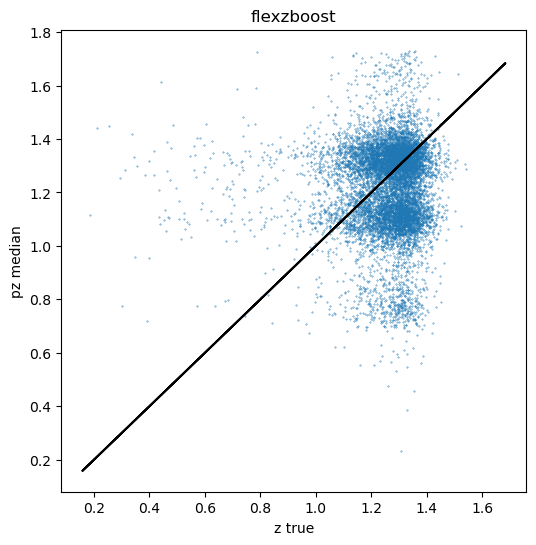

In [34]:
plt.figure(figsize = (6,6))
plt.scatter(corr_true[:10000], fzb_median, s = 0.1)
plt.plot(corr_true, corr_true, color = 'black')
plt.xlabel('z true')
plt.ylabel('pz median')
#plt.xlim(0,3)
#plt.ylim(0,3)
plt.title('flexzboost')
plt.show()

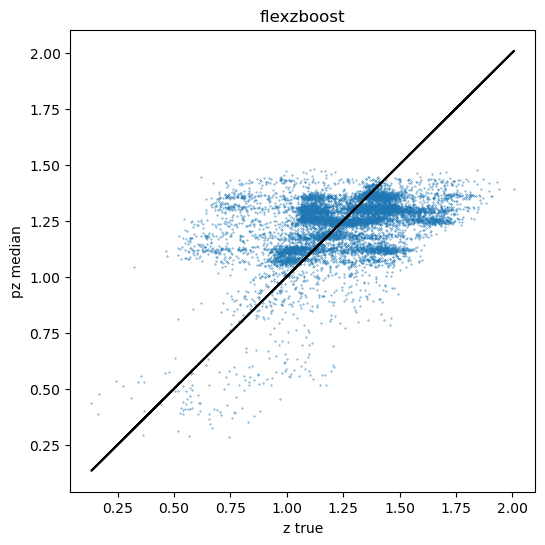

In [27]:
plt.figure(figsize = (6,6))
plt.scatter(corr_true, fzb_median, s = 0.1)
plt.plot(corr_true, corr_true, color = 'black')
plt.xlabel('z true')
plt.ylabel('pz median')
#plt.xlim(0,3)
#plt.ylim(0,3)
plt.title('flexzboost')
plt.show()

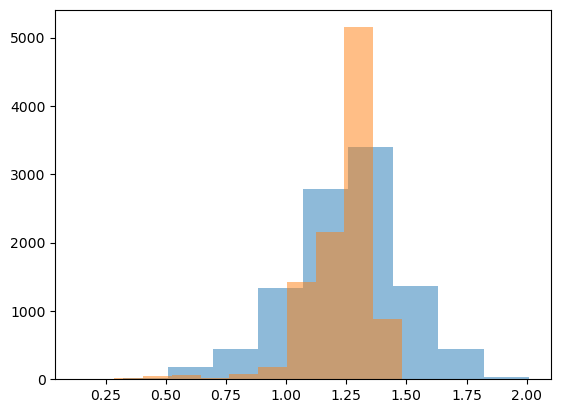

In [33]:
plt.hist(corr_true, alpha = 0.5)
plt.hist(fzb_median, alpha = 0.5)
plt.show()

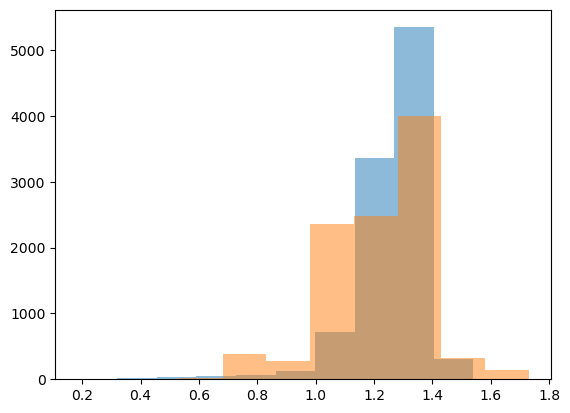

In [35]:
plt.hist(corr_true[:10000], alpha = 0.5)
plt.hist(fzb_median, alpha = 0.5)
plt.show()